In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime

import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
#assign start date and close date of share price
start = datetime.datetime(2006, 12, 30)
end = datetime.datetime(2019, 1, 1)
#up to date choice:
#end = datetime.date.today()

In [3]:
#get tickers of latest sp500 stocks
#raw infromation of sp500 originated from: https://www.suredividend.com/sp-500-stocks/
#allign the ticker with yahoo finance and remove delisted stocks: 
#ANDV->ANDX;BF.B->BF-B;BRK.B->BRK-B;CA->remove;EVHC->remove；GGP->remove; PX->remove;XL->remove
sp_500=pd.read_excel("sp_500_stocks.xlsx")
sp_500=sp_500.iloc[:500,:]
tickers=list(sp_500['Ticker'])
#append sp500 index to tickers
tickers.append('^GSPC')

In [4]:
#get all the price data from yahoo finance
panel_data = data.get_data_yahoo(tickers,start,end)

[*********************100%***********************]  501 of 501 downloaded


In [5]:
panel_data.shape

(3021, 3006)

In [6]:
panel_data.index

DatetimeIndex(['2006-12-29', '2007-01-03', '2007-01-04', '2007-01-05',
               '2007-01-08', '2007-01-09', '2007-01-10', '2007-01-11',
               '2007-01-12', '2007-01-16',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=3021, freq=None)

In [7]:
panel_data.head(3)

Open                                                          \
                    A        AAL        AAP       AAPL ABBV        ABC   ABMD   
Date                                                                            
2006-12-29  25.214592  55.759998  35.849998  11.992857  NaN  22.480000  14.64   
2007-01-03  25.028612  53.889999  35.709999  12.327143  NaN  22.540001  14.22   
2007-01-04  24.535049  56.299999  35.630001  12.007143  NaN  23.115000  14.04   

                                                ...       Volume            \
                  ABT        ACN       ADBE     ...         XLNX       XOM   
Date                                            ...                          
2006-12-29  23.414240  37.049999  41.360001     ...      2881200  12633200   
2007-01-03  23.428635  36.549999  40.720001     ...      5954900  30510700   
2007-01-04  23.538988  36.119999  39.880001     ...      5823900  31046600   

                                                                            
               XRAY      XRX XYL      YUM      ZBH    ZION ZTS       ^GSPC  
Date                                                                        
2006-12-29   497800  1058900 NaN  1639700   850000  386900 NaN  1678200000  
2007-01-03  1209500  1522400 NaN  3281300  1792400  693400 NaN  -865807296  
2007-01-04  1048000  1106300 NaN  2364900  2053000  569800 NaN -1290507296  

[3 rows x 3006 columns]

In [ ]:
#export our full data to files
panel_data.to_csv('S&P_500_DATA_YAHOO_FINANCE.csv')

In [8]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFrame is the major index of the panel_data.
close = panel_data['Adj Close']

# How do we align the existing prices in adj_close with our new set of dates?
# All we need to do is to reindex close using the index from panel_data
close = close.reindex(panel_data.index)

In [9]:
#add new daily return variable to dataset
for i in tickers:
    close['Return'+'_'+i]=close[i].pct_change(1)

In [10]:
close.head(3)

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,Return_XLNX,Return_XOM,Return_XRAY,Return_XRX,Return_XYL,Return_YUM,Return_ZBH,Return_ZION,Return_ZTS,Return_^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2006-12-29,23.007017,51.587517,34.101894,8.116311,NaN,18.310104,14.10,13.939891,28.880617,41.119999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-03,22.643923,53.934589,34.121075,8.016820,NaN,18.778452,14.05,14.014297,28.450502,39.919998,...,-0.008400,-0.032885,0.004690,-0.002950,NaN,0.001020,-0.016330,0.005701,NaN,-0.001199
2007-01-04,22.716543,56.367863,34.341648,8.194759,NaN,18.851753,14.35,14.280447,29.091766,40.820000,...,0.023719,-0.018756,0.003001,-0.000592,NaN,-0.002718,0.022308,0.004463,NaN,0.001228


In [12]:
#export our data to files
close.to_csv("S&P_500_Adjusted_Close_Price_and_daily_return.csv")

In [31]:
#read in csv file (to save time: we can directly start from this shell,please uncomment the following four lines)
# sp_500=pd.read_excel("sp_500_stocks.xlsx")
# sp_500=sp_500.iloc[:500,:]
# tickers=list(sp_500['Ticker'])
# tickers.append('^GSPC')
close=pd.read_csv("S&P_500_Adjusted_Close_Price_and_daily_return.csv").set_index('Date')
#get the end of day return dataframe
EODR=close.iloc[1:,len(tickers):]

In [25]:
EODR.describe()

,Return_A,Return_AAL,Return_AAP,Return_AAPL,Return_ABBV,Return_ABC,Return_ABMD,Return_ABT,Return_ACN,Return_ADBE,...,Return_XLNX,Return_XOM,Return_XRAY,Return_XRX,Return_XYL,Return_YUM,Return_ZBH,Return_ZION,Return_ZTS,Return_^GSPC
count,3020.000000,3020.000000,3020.000000,3020.000000,1509.000000,3020.000000,3020.000000,3020.000000,3020.000000,3020.000000,...,3020.000000,3020.000000,3020.000000,3020.000000,1814.000000,3020.000000,3020.000000,3020.000000,1488.000000,3020.000000
mean,0.000555,0.000784,0.000721,0.001183,0.000932,0.000587,0.001523,0.000628,0.000653,0.000783,...,0.000697,0.000188,0.000223,0.000019,0.000721,0.000741,0.000251,0.000357,0.000815,0.000267
std,0.019913,0.043764,0.020708,0.019967,0.017296,0.015668,0.030989,0.012935,0.015973,0.020873,...,0.018952,0.015219,0.015868,0.022083,0.014464,0.016916,0.016476,0.033224,0.014304,0.012485
min,-0.110139,-0.303595,-0.203439,-0.179195,-0.127612,-0.130314,-0.313320,-0.092908,-0.134543,-0.190346,...,-0.143094,-0.139525,-0.186416,-0.187266,-0.102600,-0.188324,-0.150938,-0.231997,-0.122066,-0.090350
25%,-0.008326,-0.017561,-0.008391,-0.007962,-0.007405,-0.006834,-0.013015,-0.005956,-0.006876,-0.008340,...,-0.008718,-0.006755,-0.007116,-0.009951,-0.006998,-0.007094,-0.007333,-0.011980,-0.006388,-0.004024
50%,0.000718,0.000000,0.000386,0.000988,0.001406,0.000801,0.000953,0.000482,0.000892,0.000925,...,0.000659,0.000123,0.000487,0.000000,0.000738,0.000796,0.000521,0.000324,0.000629,0.000590
75%,0.010278,0.018017,0.009251,0.011157,0.009511,0.008801,0.015529,0.007596,0.008211,0.010549,...,0.010237,0.007223,0.008347,0.010450,0.008873,0.008555,0.008500,0.011979,0.007848,0.005535
max,0.138790,0.587360,0.165576,0.139050,0.137673,0.102207,0.292778,0.096259,0.163668,0.143581,...,0.150058,0.171905,0.107245,0.198055,0.124438,0.114710,0.131463,0.275568,0.114062,0.115800


In [32]:
#change column names
names=[]
for i in EODR.columns:
    names.append(i.split("_")[1])
EODR.columns=names

In [33]:
#build up a correlation matrix
corr=EODR.corr()

In [34]:
# Transform it in a links data frame (3 columns only):
links = corr.stack().reset_index()
links.columns = ['var1', 'var2','value']
links.head()

,var1,var2,value
0,A,A,1.000000
1,A,AAL,0.366678
2,A,AAP,0.339641
3,A,AAPL,0.453764
4,A,ABBV,0.395127


In [87]:
# Keep only correlation over a threshold and remove self correlation (cor(A,A)=1)
#threshold=3/np.sqrt(len(close))
threshold=0.75
links_filtered=links.loc[ (links['value'] > threshold) & (links['var1'] != links['var2']) ]
links_filtered.head()

,var1,var2,value
631,AAL,DAL,0.754789
952,AAL,UAL,0.795123
5457,ADI,TXN,0.761567
6512,ADP,^GSPC,0.758874
7531,AEE,AEP,0.782495


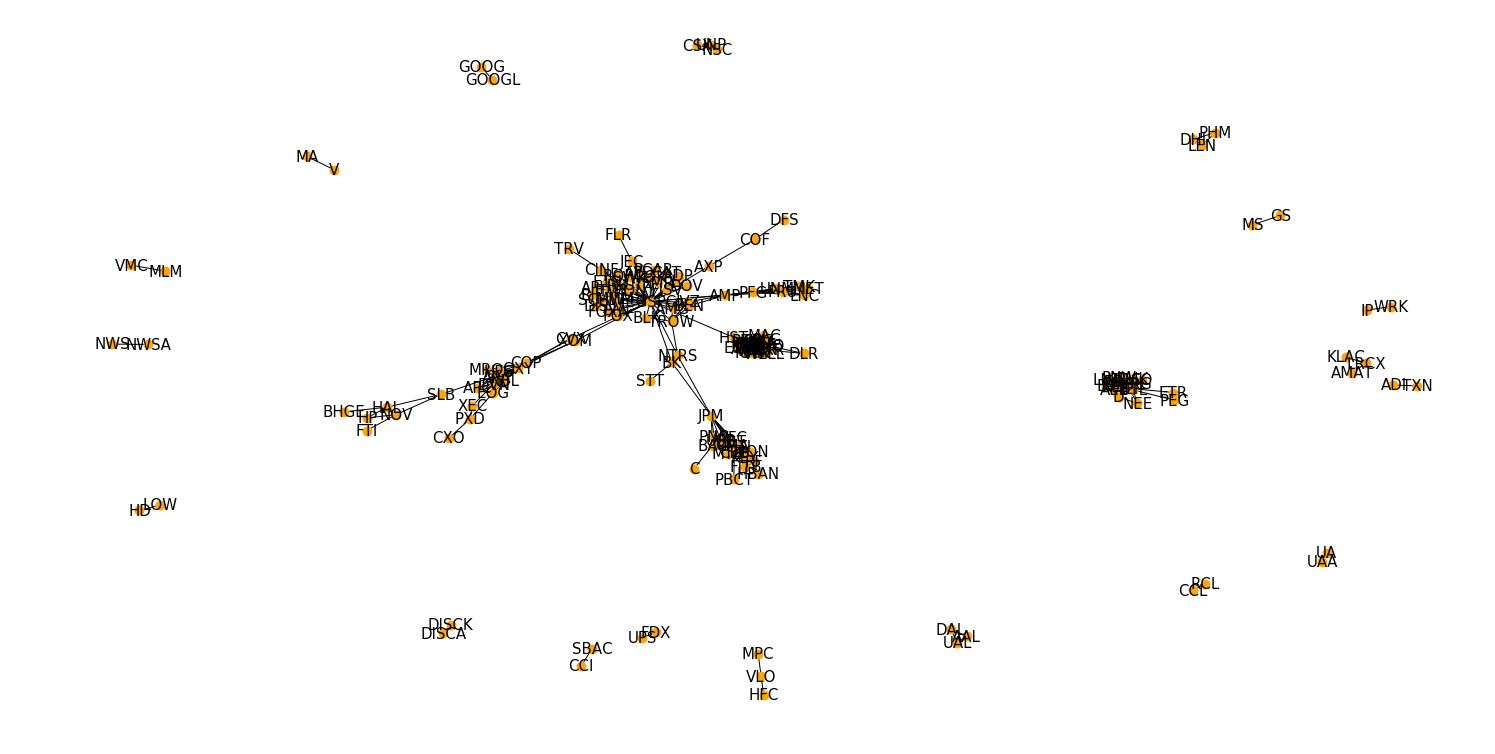

In [88]:
fig = plt.figure(figsize=(20,10))
# Build our graph
G=nx.from_pandas_edgelist(links_filtered, 'var1', 'var2')
# Plot the threshold network:
nx.draw(G, with_labels=True, node_color='orange', node_size=80, edge_color='black', linewidths=1, font_size=15) 

# Reference

Onnela, J.P., Chakraborti, A., Kaski, K., Kertesz, J., Kanto, A.: Asset trees and asset graphs in ﬁnancial markets. Phys. Scr. T 106, 48–54 (2003)

Onnela, J.P., Kaski, K., Kertesz, J.: Clustering and information in correlation based ﬁnancial networks. Eur. Phys. J. B 38, 353–362 (2004)

Battiston S, Glattfelder JB, Garlaschelli D, Lillo F, Caldarelli G. The structure of financial networks. In: ; 2010.